# timeseries-generator
Nike produsert syntetisk tidsserie datasett-generator, med fokus på generering av ikke-sensitive data. Bruksområdet er en mere tradisjonell software testing til blant annet demoløsninger, og til å blant annet teste effektiviteten til disse løsningene og/eller algoritmene. For å teste algoritmer for eksempel så er tidsserier som inneholder forskjellige typer trender. Python-pakken skal bidra til å lage forskjellige typer tidsserier samtidig som den kan vedlikeholdes.

timeseries_generator-pakke
For denne pakken er det antatt at en tidsserie er satt sammen av en grunnverdi multiplisert med mange faktorer.

ts = base_value * faktor1 * faktor2 * ... * faktorN + Noiser

In [1]:
import pandas as pd
from pandas._libs.tslibs.timestamps import Timestamp
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor, HolidayFactor, WeekdayFactor
from timeseries_generator.external_factors import CountryGdpFactor, EUIndustryProductFactor

Disse faktorene kan være hva som helst, tilfeldig støy, lineære trender eller sesongvariasjoner. Faktorene kan påvirke ulike funksjoner. For eksempel kan noen funksjoner i tidsserien din ha en sesongkomponent, mens andre ikke har det.

Ulike faktorer er representert i ulike klasser, som arver fra BaseFactor-klassen. Faktorklasser er input for Generator-klassen, som lager en dataramme som inneholder funksjonene, basisverdien, alle de forskjellige faktorene som fungerer på basisverdien og den endelige faktoren og verdien.

* Kjernekonsept
Generator: en pythonklasse for å generere tidsserien. En generator inneholder en liste over faktorer og støy. Ved å overlegge faktorene og støyen kan generatoren produsere en tilpasset tidsserie
* Faktor: en pythonklasse for å generere trend, sesongvariasjoner, feriefaktorer osv. Faktorer trer i kraft ved å multiplisere på grunnverdien til generatoren.
* Noised: en pythonklasse for å generere tidsseriestøydata. Noiser trer i kraft ved å summere på toppen av "faktoriserte" tidsserier. Denne formelen beskriver konseptene vi snakker om ovenfor
Innebygde faktorer
* LinearTrend: gi en lineær trend basert på inngangshellingen og skjæringspunktet
* CountryYearlyTrend: gi en årlig basert markedsverdifaktor basert på BNP per innbygger.
* EUEcoTrendComponents: gir en månedlig endret faktor basert på EU-industriproduktets offentlige data
* HolidayTrendComponents: simuler toppen av høytidssalget. Den tilpasser feriedagene – forskjellig i ulike land
* BlackFridaySaleComponents: simuler BlackFriday-salgsarrangementet
* WeekendTrendComponents: mer salg i helgene enn på hverdager
* FeatureRandFactorComponents: sett opp forskjellige salgsbeløp for forskjellige butikker og forskjellige produkter
* ProductSeasonTrendComponents: simuler sesongsensitive produktsalg. I denne eksempelkoden har vi 3 forskjellige produkttyper:
* vinterjakke: omvendt proporsjonal med temperaturen, mer salg om vinteren
* basketball topp: proporsjonal med temperaturen, mer salg om sommeren
* Yogamatte: temperaturufølsom
Installasjon

<AxesSubplot:xlabel='date'>

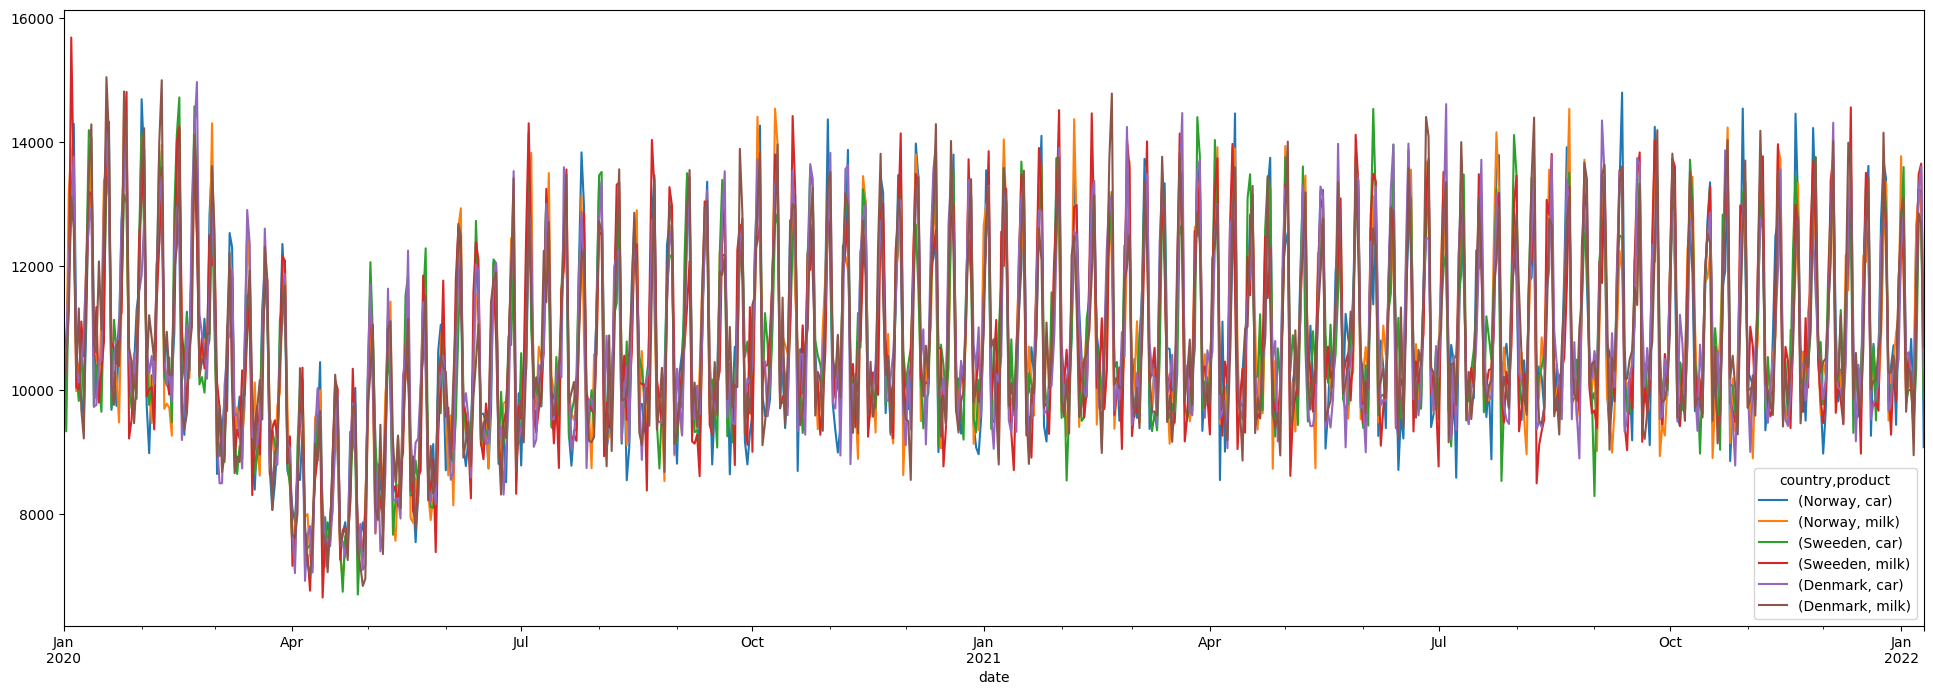

In [3]:
start_date = Timestamp("01-01-2020")
end_date = Timestamp("01-10-2022")
features_dict = {"country": ["Norway", "Sweeden", "Denmark"],
                 "product": ["car", "milk"]}
g: Generator = Generator(
    factors={CountryGdpFactor(), 
             EUIndustryProductFactor(), 
             HolidayFactor(holiday_factor=2.,
                           special_holiday_factors={"Christmas Day": 10.}),
             WeekdayFactor(col_name="weekend_boost_factor", factor_values={4: 1.15, 5: 1.3, 6: 1.3} ),
             WhiteNoise()
            },
    features=features_dict,
    date_range=pd.date_range(start=start_date, end=end_date),
    base_value=10000
)

df = g.generate()
plot_df = df.set_index('date')
plot_df[['country', 'value', 'product']].pivot(columns=['country', 'product'], values='value').plot(figsize=(24,8))



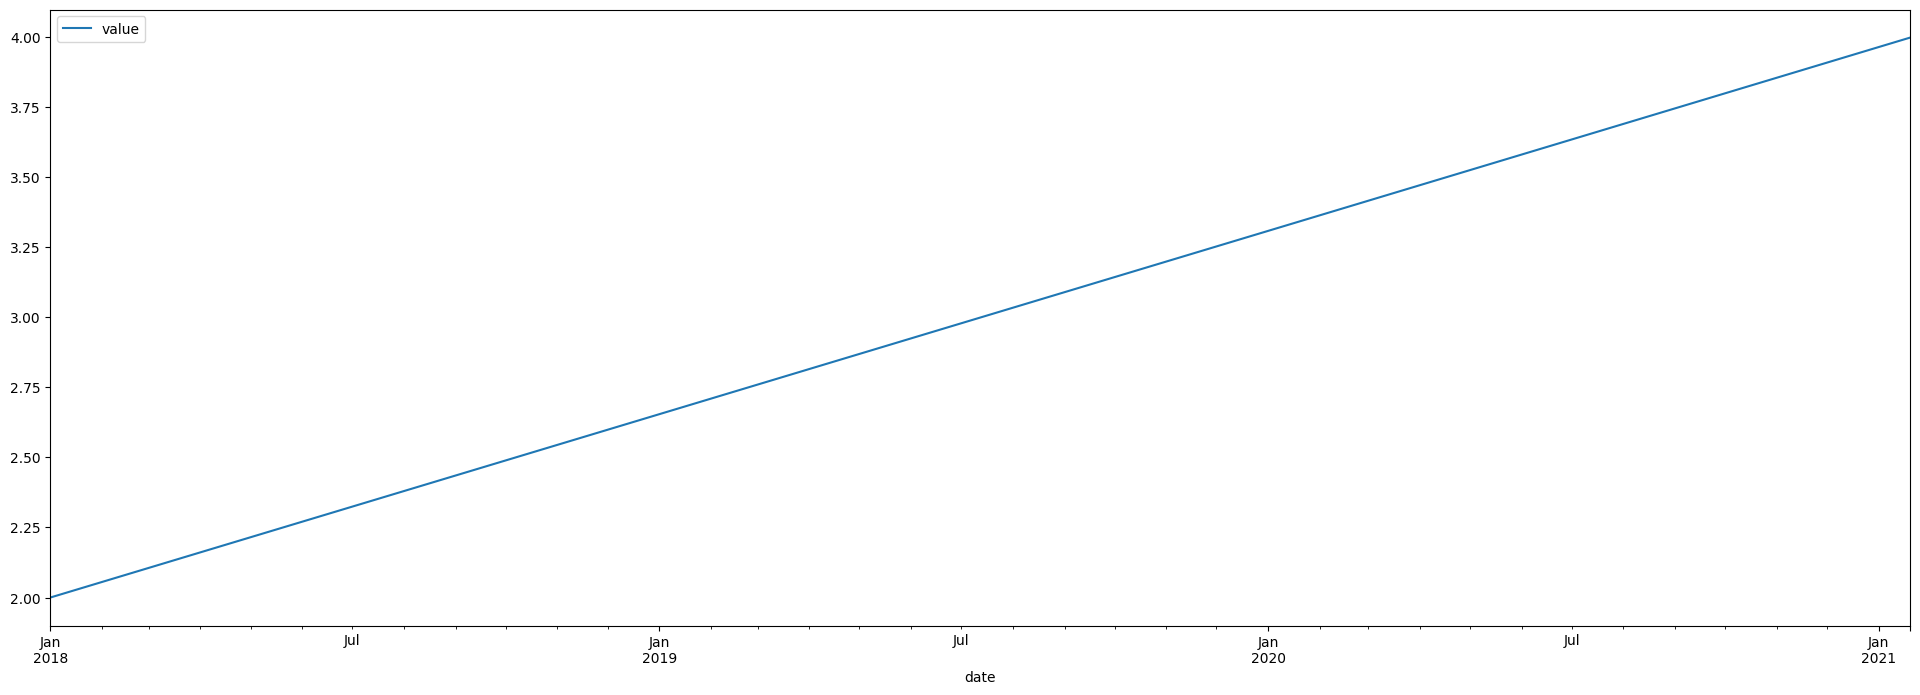

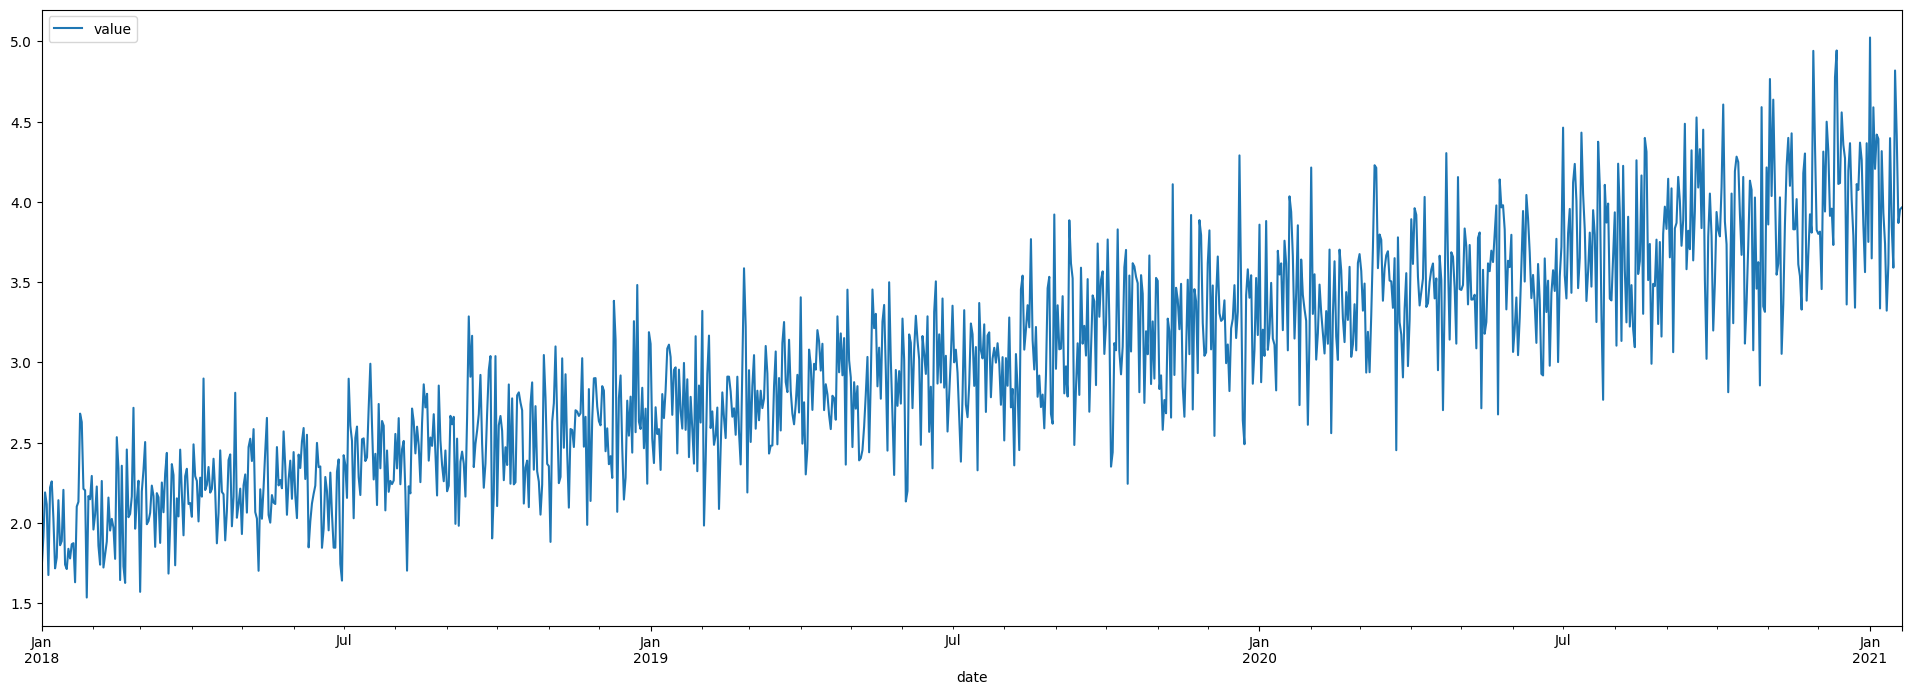

In [6]:
# setting up a linear tren
lt = LinearTrend(coef=2.0, offset=1., col_name="my_linear_trend")
g = Generator(factors={lt}, features=None, date_range=pd.date_range(start="01-01-2018", end="01-20-2021"))
g.generate()
g.plot()
# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.11)
g.update_factor(wn)
g.generate()
g.plot()

In [ ]:
!pip install timeseries-generator

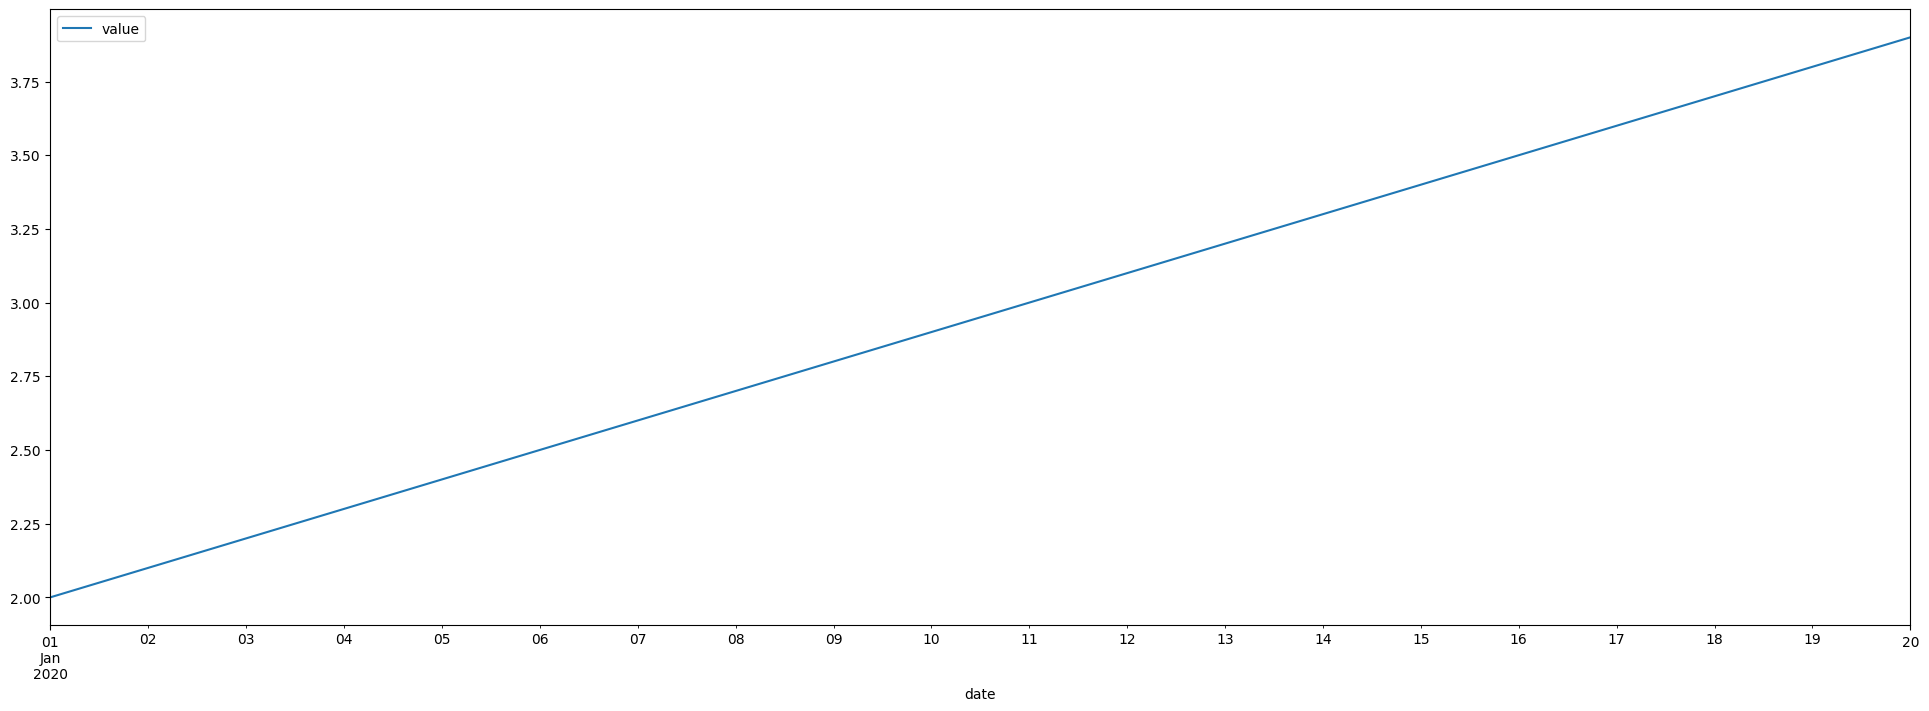

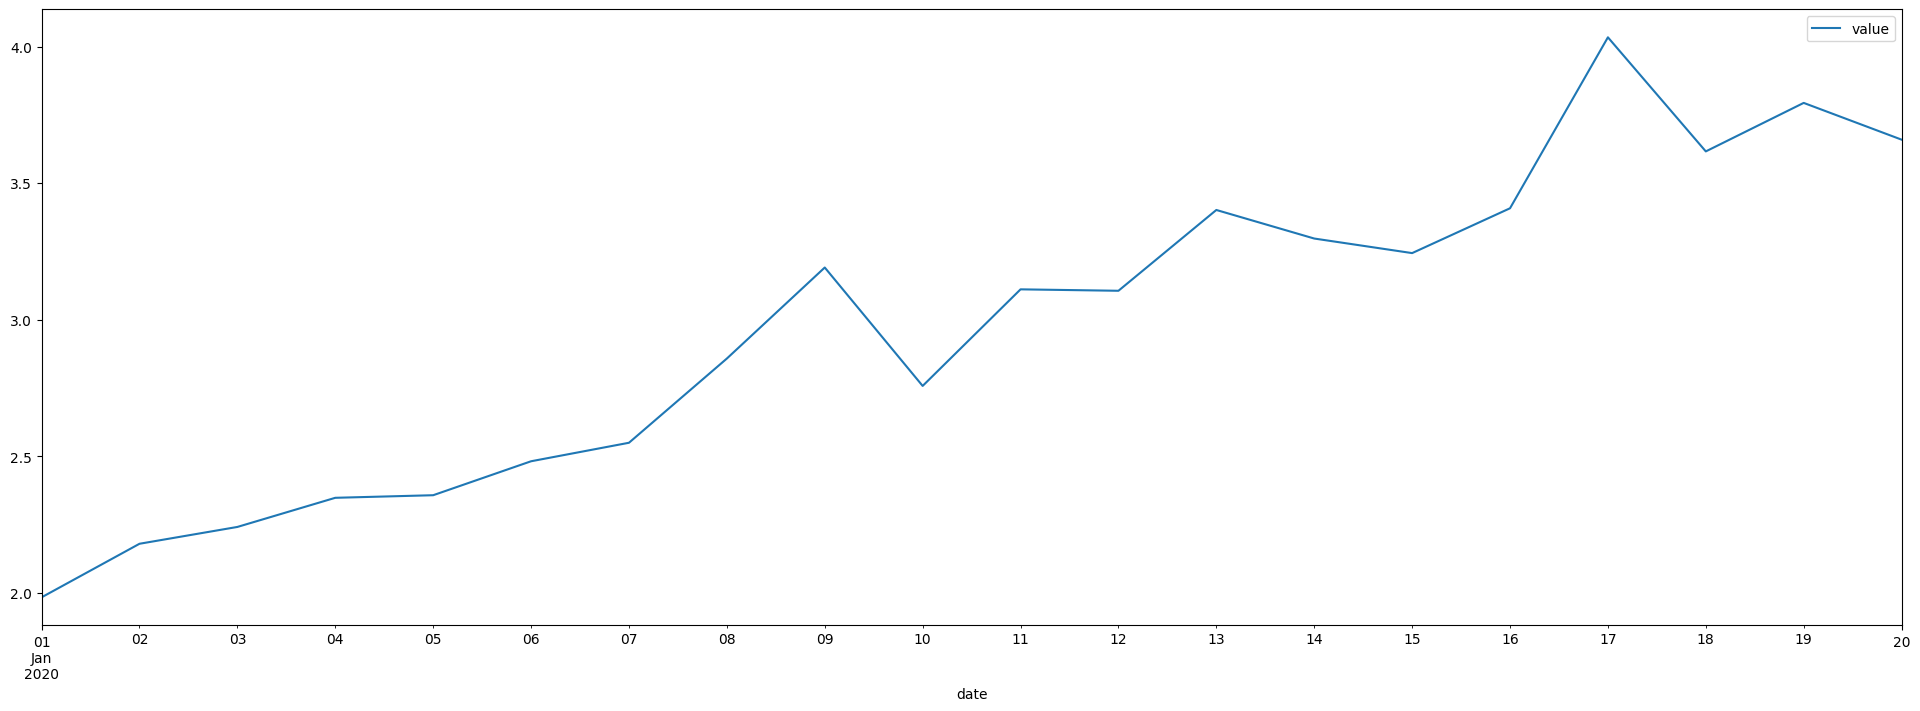

In [ ]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor
import pandas as pd

# setting up a linear tren
lt = LinearTrend(coef=2.0, offset=1., col_name="my_linear_trend")
g = Generator(factors={lt}, features=None, date_range=pd.date_range(start="01-01-2020", end="01-20-2020"))
g.generate()
g.plot()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.05)
g.update_factor(wn)
g.generate()
g.plot()

## Timeseries-Generator
This repository consists of a python packages that generates synthetic time series dataset in a generic way (under /timeseries_generator) and demo notebooks on how to generate synthetic timeseries data (under /examples). The goal here is to have non-sensitive data available to demo solutions and test the effectiveness of those solutions and/or algorithms. In order to test your algorithm, you want to have time series available containing different kinds of trends. The python package should help create different kinds of time series while still being maintainable.

$$ 
ts = base_value * factor1 * factor2 * ... * factorN + Noiser
$$

## timeseries_generator package
For this package, it is assumed that a time series is composed of a base value multiplied by many factors.

These factors can be anything, random noise, linear trends, to seasonality. The factors can affect different features. For example, some features in your time series may have a seasonal component, while others do not.

Different factors are represented in different classes, which inherit from the BaseFactor class. Factor classes are input for the Generator class, which creates a dataframe containing the features, base value, all the different factors working on the base value and and the final factor and value.

## Core concept
Generator: a python class to generate the time series. A generator contains a list of factors and noiser. By overlaying the factors and noiser, generator can produce a customized time series
Factor: a python class to generate the trend, seasonality, holiday factors, etc. Factors take effect by multiplying on the base value of the generator.
Noised: a python class to generate time series noise data. Noiser take effect by summing on top of "factorized" time series. This formula describes the concepts we talk above
## Built-in Factors
LinearTrend: give a linear trend based on the input slope and intercept
CountryYearlyTrend: give a yearly-based market cap factor based on the GDP per - capita.
EUEcoTrendComponents: give a monthly changed factor based on EU industry product public data
HolidayTrendComponents: simulate the holiday sale peak. It adapts the holiday days - differently in different country
BlackFridaySaleComponents: simulate the BlackFriday sale event
WeekendTrendComponents: more sales at weekends than on weekdays
FeatureRandFactorComponents: set up different sale amount for different stores and different product
ProductSeasonTrendComponents: simulate season-sensitive product sales. In this example code, we have 3 different types of product:
winter jacket: inverse-proportional to the temperature, more sales in winter
basketball top: proportional to the temperature, more sales in summer
Yoga Mat: temperature insensitive


In [7]:
#We want to be able to generate synthetic timeseries data to test and compare our algorithms. 
# In order to have some control over the trends in the timeseries, we use the simple package timeseries generator in this repository.



%matplotlib inline
#We can now start by setting up a linear trend. Trends are collected in a generator, which takes any dependent variables as features and the trends you have added to compose the time-series dataframe.

lt = LinearTrend(coef=2.0, offset=1., col_name="my_linear_trend")

g: Generator = Generator(factors={lt}, features=None, date_range=pd.date_range(start="01-01-2020", end="01-20-2020"))
g.generate()
g.plot()
We can update our package by adding some white noise to the generator. The white noise adds noise with a standard deviation as a fraction of the total value to our timeseries.

wn = WhiteNoise(stdev_factor=0.05)
g.update_factor(wn)
g.generate()
g.plot()
#We can add dependent feature columns to our timeseries. In this case, we introduce a random factor to these features. This factor will be dependent on a feature that we introduce to the generator.

rff = RandomFeatureFactor(
    feature="my_feature",
    feature_values=["feature1", "feature2"],
    min_factor_value=1,
    max_factor_value=10
)
g.update_factor(rff)
g.features = {"my_feature": ["feature1", "feature2"]}
df: pd.DataFrame = g.generate()
print(df.head(5))
The resulting dataframe is a dataframe with all the features and factors influencing the features. We can plot the final value per product.

df_plot=df.set_index('date')
df_plot[["my_feature", "value"]].pivot(columns=["my_feature"], values="value").plot()
We can also add different linear trends for different feature values.

lt2 = LinearTrend(feature="my_feature", feature_values={
    "feature1": {"coef": 1., "offset": 1.},
    "feature2": {"coef": 0.05, "offset": 1.}
})

g.update_factor(lt2)
df = g.generate()

df_plot=df.set_index('date')
df_plot[["my_feature", "value"]].pivot(columns=["my_feature"], values="value").plot()

SyntaxError: invalid syntax (3151703615.py, line 14)

In [19]:
from timeseries_generator import LinearTrend, Generator, WhiteNoise, RandomFeatureFactor
import pandas as pd

# setting up a linear tren
lt = LinearTrend(coef=2.0, offset=1., col_name="my_linear_trend")
g = Generator(factors={lt}, features=None, date_range=pd.date_range(start="01-01-2020", end="01-20-2020"))
g.generate()
g.plot()

# update by adding some white noise to the generator
wn = WhiteNoise(stdev_factor=0.05)
g.update_factor(wn)
g.generate()
g.plot()

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/Users/m0/miniforge3/envs/mambamojb/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3378, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/93/6sy7vf8142969b_8w873sxcc0000gn/T/ipykernel_24995/2674004044.py", line 8, in <module>
    g.plot()
  File "/Users/m0/miniforge3/envs/mambamojb/lib/python3.9/site-packages/timeseries_generator/generator.py", line 126, in plot
    self._ts.plot(x="date", y="value", figsize=(24, 8))
  File "/Users/m0/miniforge3/envs/mambamojb/lib/python3.9/site-packages/pandas/plotting/_core.py", line 921, in __call__
    raise ValueError("x must be a label or position")
  File "/Users/m0/miniforge3/envs/mambamojb/lib/python3.9/site-packages/pandas/plotting/_core.py", line 1908, in _get_plot_backend
  File "/Users/m0/miniforge3/envs/mambamojb/lib/python3.9/site-packages/pandas/plotting/_core.py", line 1839, in _load_backend
ImportError: matplotlib is required for plot